In [1]:
#加载包
import numpy as np
import pandas as pd 
import  scipy.signal.signaltools
def _centered(arr, newsize):
    # Return the center newsize portion of the array.
    newsize = np.asarray(newsize)
    currsize = np.array(arr.shape)
    startind = (currsize - newsize) // 2
    endind = startind + newsize
    myslice = [slice(startind[k], endind[k]) for k in range(len(endind))]
    return arr[tuple(myslice)]


scipy.signal.signaltools. _centered = _centered
import statsmodels.api as sm
import seaborn as sbn

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [3]:
dt = pd.read_csv(r"~\Input\Training_immunity.csv", header=0)
dt.head()

,Group,my1,my2,my3,my4,my5,my6,my7,my8
0,1,7.9,5.86,64.9,28.2,82.2,47.8,48.7,23.90
1,1,14.2,5.48,67.7,25.8,76.6,42.4,44.8,34.80
2,0,14.7,3.31,53.4,6.7,69.8,37.9,56.0,3.91
3,1,20.4,7.11,67.2,11.0,90.1,31.5,50.8,24.10
4,1,9.3,1.30,41.4,54.5,79.3,57.3,55.3,32.60


In [4]:
X = dt.drop(["Group"], axis=1)
X

,my1,my2,my3,my4,my5,my6,my7,my8
0,7.90,5.86,64.9,28.2,82.2,47.8,48.7,23.90
1,14.20,5.48,67.7,25.8,76.6,42.4,44.8,34.80
2,14.70,3.31,53.4,6.7,69.8,37.9,56.0,3.91
3,20.40,7.11,67.2,11.0,90.1,31.5,50.8,24.10
4,9.30,1.30,41.4,54.5,79.3,57.3,55.3,32.60
...,...,...,...,...,...,...,...,...
74,10.40,8.15,67.0,20.5,70.8,43.8,40.9,16.20
75,12.70,15.60,55.0,25.4,78.9,44.1,43.7,21.70
76,8.89,7.43,67.6,20.2,72.2,55.9,41.1,16.50
77,10.50,4.50,66.4,25.0,73.7,59.5,50.6,11.40


In [12]:
# Training and internal validation in immune model (100 samplings)

dt = pd.read_csv(r"~\Input\Training_immunity.csv", header=0)
y = dt["Group"]
X = dt.drop(["Group"], axis=1)

auc_scores = []
for random_state in range(40, 140):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=random_state,stratify=dt["Group"])
    lgbm = LGBMClassifier()
    lgbm_model = lgbm.fit(X_train, y_train)
    y_pred_proba = lgbm_model.predict_proba(X_test)
    auc = roc_auc_score(y_test, y_pred_proba[:,1])
    auc_scores.append(auc)
    print(f"Random State: {random_state}, AUC: {auc:.4f}")


mean_auc = sum(auc_scores) / len(auc_scores)
print(f"Mean AUC: {mean_auc:.4f}")

Random State: 40, AUC: 0.8852
Random State: 41, AUC: 0.7959
Random State: 42, AUC: 0.7781
Random State: 43, AUC: 0.7449
Random State: 44, AUC: 0.8469
Random State: 45, AUC: 0.7602
Random State: 46, AUC: 0.7934
Random State: 47, AUC: 0.7143
Random State: 48, AUC: 0.7781
Random State: 49, AUC: 0.7985
Random State: 50, AUC: 0.8316
Random State: 51, AUC: 0.7679
Random State: 52, AUC: 0.7372
Random State: 53, AUC: 0.7755
Random State: 54, AUC: 0.8827
Random State: 55, AUC: 0.7959
Random State: 56, AUC: 0.8520
Random State: 57, AUC: 0.6122
Random State: 58, AUC: 0.8036
Random State: 59, AUC: 0.7883
Random State: 60, AUC: 0.8546
Random State: 61, AUC: 0.8240
Random State: 62, AUC: 0.8163
Random State: 63, AUC: 0.7857
Random State: 64, AUC: 0.8112
Random State: 65, AUC: 0.7934
Random State: 66, AUC: 0.7423
Random State: 67, AUC: 0.9133
Random State: 68, AUC: 0.7755
Random State: 69, AUC: 0.7653
Random State: 70, AUC: 0.6913
Random State: 71, AUC: 0.8469
Random State: 72, AUC: 0.7602
Random Sta

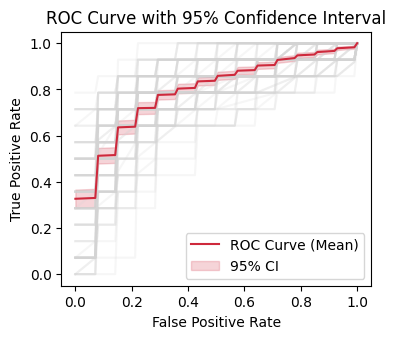

Mean AUC: 0.7921
95% CI for AUC: (0.7794, 0.8047)


In [38]:
# Internal validation in immune model (100 samplings)

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc as sklearn_auc


dt = pd.read_csv(r"~\Input\Training_immunity.csv", header=0)
y = dt["Group"]
X = dt.drop(["Group"], axis=1)


all_fpr = np.linspace(0, 1, 100)  
mean_tpr = []  
tpr_list = [] 
auc_scores = [] 


for random_state in range(40, 140):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=random_state,stratify=dt["Group"])
    lgbm = LGBMClassifier()
    lgbm_model = lgbm.fit(X_train, y_train)
    y_pred_proba = lgbm_model.predict_proba(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:,1])
    
    interpolated_tpr = np.interp(all_fpr, fpr, tpr)
    
    tpr_list.append(interpolated_tpr)
    

    auc = sklearn_auc(fpr, tpr)
    auc_scores.append(auc)


mean_tpr = np.mean(tpr_list, axis=0)
std_tpr = np.std(tpr_list, axis=0)


tpr_upper = mean_tpr + 1.96 * std_tpr / np.sqrt(len(tpr_list))
tpr_lower = mean_tpr - 1.96 * std_tpr / np.sqrt(len(tpr_list))

mean_auc = np.mean(auc_scores)
std_auc = np.std(auc_scores)
ci_upper = mean_auc + 1.96 * std_auc / np.sqrt(len(auc_scores))
ci_lower = mean_auc - 1.96 * std_auc / np.sqrt(len(auc_scores))


pdf_file_path = r"xx.pdf"
plt.figure(figsize=(4, 3.3))  


for tpr in tpr_list:
    plt.plot(all_fpr, tpr, alpha=0.2, color='lightgrey')


plt.plot(all_fpr, mean_tpr, label='ROC Curve (Mean)', color='#CE293C')
plt.fill_between(all_fpr, tpr_lower, tpr_upper, color='#CE293C', alpha=0.2, label='95% CI')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC Curve with 95% Confidence Interval')
plt.ylim([-0.05, 1.05])
plt.legend(loc='lower right')

plt.savefig(pdf_file_path, format='pdf', bbox_inches='tight')


plt.show()


print(f"Mean AUC: {mean_auc:.4f}")
print(f"95% CI for AUC: ({ci_lower:.4f}, {ci_upper:.4f})")

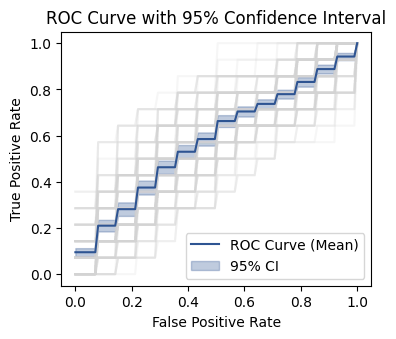

Mean AUC: 0.5775
95% CI for AUC: (0.5612, 0.5938)


In [39]:
# Internal validation in clinical model (100 samplings)

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc as sklearn_auc

dt = pd.read_csv(r"~\Input\Training_clinical.csv", header=0)
y = dt["Group"]
X = dt.drop(["Group"], axis=1)


all_fpr2 = np.linspace(0, 1, 100) 
mean_tpr2 = []  
tpr2_list = []  
auc_scores = []  


for random_state in range(40, 140):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=random_state,stratify=dt["Group"])
    nb = GaussianNB()
    nb_model = nb.fit(X_train, y_train)
    y_pred_proba = nb_model.predict_proba(X_test)
    fpr2, tpr2, _ = roc_curve(y_test, y_pred_proba[:,1])
    
 
    interpolated_tpr2 = np.interp(all_fpr2, fpr2, tpr2)
    
    tpr2_list.append(interpolated_tpr2)
    

    auc = sklearn_auc(fpr2, tpr2) 
    auc_scores.append(auc)


mean_tpr2 = np.mean(tpr2_list, axis=0)
std_tpr2 = np.std(tpr2_list, axis=0)


tpr2_upper = mean_tpr2 + 1.96 * std_tpr2 / np.sqrt(len(tpr2_list))
tpr2_lower = mean_tpr2 - 1.96 * std_tpr2 / np.sqrt(len(tpr2_list))


mean_auc = np.mean(auc_scores)
std_auc = np.std(auc_scores)
ci_upper = mean_auc + 1.96 * std_auc / np.sqrt(len(auc_scores))
ci_lower = mean_auc - 1.96 * std_auc / np.sqrt(len(auc_scores))


pdf_file_path = r"xx.pdf"
plt.figure(figsize=(4, 3.3))  


for tpr2 in tpr2_list:
    plt.plot(all_fpr2, tpr2, alpha=0.2, color='lightgrey')


plt.plot(all_fpr2, mean_tpr2, label='ROC Curve (Mean)', color='#2E5492')
plt.fill_between(all_fpr2, tpr2_lower, tpr2_upper, color='#2E5492', alpha=0.3, label='95% CI')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC Curve with 95% Confidence Interval')
plt.ylim([-0.05, 1.05])
plt.legend(loc='lower right')

plt.savefig(pdf_file_path, format='pdf', bbox_inches='tight')


plt.show()


print(f"Mean AUC: {mean_auc:.4f}")
print(f"95% CI for AUC: ({ci_lower:.4f}, {ci_upper:.4f})")

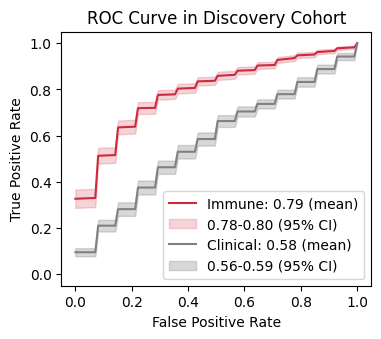

In [40]:
# Internal validation in immune and clinical model (100 samplings)


pdf_file_path = r"xx.pdf"
plt.figure(figsize=(4, 3.3))  


plt.plot(all_fpr, mean_tpr, label='Immune: 0.79 (mean)', color='#CE293C')
plt.fill_between(all_fpr, tpr_lower, tpr_upper, color='#CE293C', alpha=0.2, label='0.78-0.80 (95% CI)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC Curve with 95% Confidence Interval')
plt.ylim([-0.05, 1.05])
plt.legend(loc='lower right')

plt.plot(all_fpr2, mean_tpr2, label='Clinical: 0.58 (mean)', color='grey')
plt.fill_between(all_fpr2, tpr2_lower, tpr2_upper, color='grey', alpha=0.3, label='0.56-0.59 (95% CI)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC Curve in Discovery Cohort')
plt.ylim([-0.05, 1.05])
plt.legend(loc='lower right')


plt.savefig(pdf_file_path, format='pdf', bbox_inches='tight')

plt.show()


  0%|          | 0/79 [00:00<?, ?it/s]

Usage of np.ndarray subset (sliced data) is not recommended due to it will double the peak memory cost in LightGBM.
Usage of np.ndarray subset (sliced data) is not recommended due to it will double the peak memory cost in LightGBM.
Usage of np.ndarray subset (sliced data) is not recommended due to it will double the peak memory cost in LightGBM.
Usage of np.ndarray subset (sliced data) is not recommended due to it will double the peak memory cost in LightGBM.
Usage of np.ndarray subset (sliced data) is not recommended due to it will double the peak memory cost in LightGBM.
Usage of np.ndarray subset (sliced data) is not recommended due to it will double the peak memory cost in LightGBM.
Usage of np.ndarray subset (sliced data) is not recommended due to it will double the peak memory cost in LightGBM.
Usage of np.ndarray subset (sliced data) is not recommended due to it will double the peak memory cost in LightGBM.
Usage of np.ndarray subset (sliced data) is not recommended due to it wi

Usage of np.ndarray subset (sliced data) is not recommended due to it will double the peak memory cost in LightGBM.
Usage of np.ndarray subset (sliced data) is not recommended due to it will double the peak memory cost in LightGBM.
Usage of np.ndarray subset (sliced data) is not recommended due to it will double the peak memory cost in LightGBM.
Usage of np.ndarray subset (sliced data) is not recommended due to it will double the peak memory cost in LightGBM.
Usage of np.ndarray subset (sliced data) is not recommended due to it will double the peak memory cost in LightGBM.
Usage of np.ndarray subset (sliced data) is not recommended due to it will double the peak memory cost in LightGBM.
Usage of np.ndarray subset (sliced data) is not recommended due to it will double the peak memory cost in LightGBM.
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


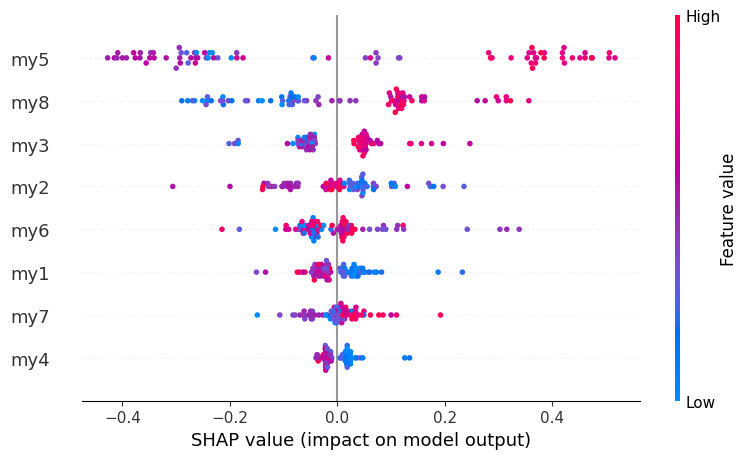

In [25]:
# SHAP VALUE
import shap

dt = pd.read_csv(r"~\Input\Training_immunity.csv", header=0)
y = dt["Group"]
X = dt.drop(["Group"], axis=1)

lgbm = LGBMClassifier()
lgbm_model = lgbm.fit(X, y)

explainer = shap.KernelExplainer(lgbm_model.predict, X)

shap_values = explainer.shap_values(X)

shap.summary_plot(shap_values, X)

shap_v = pd.DataFrame(shap_values)
feature_list = X.columns
shap_v.columns = feature_list
X_v = X_train.copy().reset_index().drop('index',axis=1)

shap_v.to_csv(r'SHAP.csv')

  Variable  SHAP_abs     Sign
3      my4  0.023794  #284A86
6      my7  0.033148  #CF2E41
0      my1  0.040144  #284A86
5      my6  0.062121  #CF2E41
1      my2  0.069043  #284A86
2      my3  0.070093  #CF2E41
7      my8  0.146104  #CF2E41
4      my5  0.306863  #CF2E41


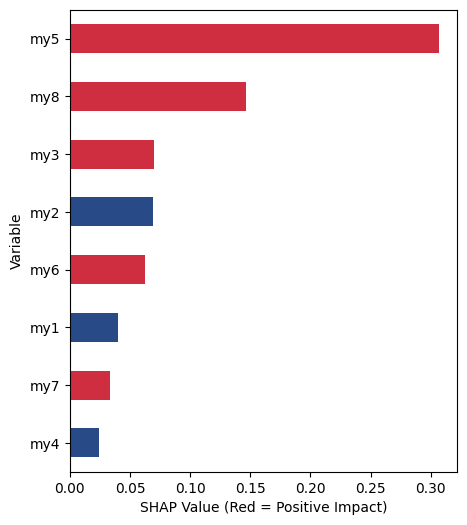

In [27]:
def ABS_SHAP(df_shap,df):
    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index',axis=1)

    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    corr_df.columns  = ['Variable','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'#CF2E41','#284A86')


    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variable','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variable',right_on='Variable',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variable',y='SHAP_abs',color = colorlist, figsize=(5,6),legend=False)
    ax.set_xlabel("SHAP Value (Red = Positive Impact)")
    


    return k2[['Variable', 'SHAP_abs', 'Sign']]


shap_info = ABS_SHAP(shap_values, X)
print(shap_info)

shap_info.to_csv(r'XX.csv')

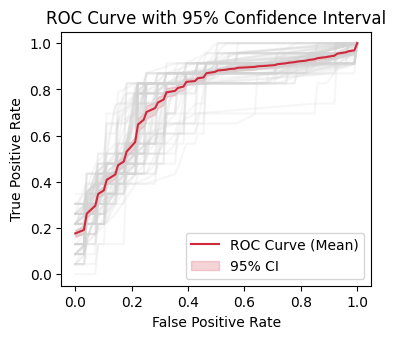

Mean AUC: 0.7640
95% CI for AUC: (0.7560, 0.7721)


In [34]:
# External validation in immune model (100 samplings)

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc as sklearn_auc


dt = pd.read_csv(r"~\Input\Training_immunity.csv", header=0)
y = dt["Group"]
X = dt.drop(["Group"], axis=1)


dt2 = pd.read_csv(r"~\Input\Validation_immunity.csv", header=0)
y_test2 = dt2["Group"]
X_test2 = dt2.drop(["Group"], axis=1)



all_fpr = np.linspace(0, 1, 100)  
mean_tpr = [] 
tpr_list = []  
auc_scores = [] 



for random_state in range(40, 140):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=random_state,stratify=dt["Group"])
    lgbm = LGBMClassifier()
    lgbm_model = lgbm.fit(X_train, y_train)
    y_pred_proba = lgbm_model.predict_proba(X_test2)
    fpr, tpr, _ = roc_curve(y_test2, y_pred_proba[:,1])
    interpolated_tpr = np.interp(all_fpr, fpr, tpr)
    tpr_list.append(interpolated_tpr)
    auc = sklearn_auc(fpr, tpr)  
    auc_scores.append(auc)
    
    
mean_tpr = np.mean(tpr_list, axis=0)
std_tpr = np.std(tpr_list, axis=0)

tpr_upper = mean_tpr + 1.96 * std_tpr / np.sqrt(len(tpr_list))
tpr_lower = mean_tpr - 1.96 * std_tpr / np.sqrt(len(tpr_list))

mean_auc = np.mean(auc_scores)
std_auc = np.std(auc_scores)
ci_upper = mean_auc + 1.96 * std_auc / np.sqrt(len(auc_scores))
ci_lower = mean_auc - 1.96 * std_auc / np.sqrt(len(auc_scores))


pdf_file_path = r"~\roc_curve.pdf"
plt.figure(figsize=(4, 3.3))  


for tpr in tpr_list:
    plt.plot(all_fpr, tpr, alpha=0.2, color='lightgrey')


plt.plot(all_fpr, mean_tpr, label='ROC Curve (Mean)', color='#CE293C')
plt.fill_between(all_fpr, tpr_lower, tpr_upper, color='#CE293C', alpha=0.2, label='95% CI')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC Curve with 95% Confidence Interval')


plt.savefig(pdf_file_path, format='pdf', bbox_inches='tight')


plt.show()


print(f"Mean AUC: {mean_auc:.4f}")
print(f"95% CI for AUC: ({ci_lower:.4f}, {ci_upper:.4f})")


Best decision threshold (Youden index): 0.1771

Confusion Matrix:
[[20  8]
 [ 4 19]]
Sensitivity (Recall for class 1): 0.8261
Specificity: 0.7143
Accuracy: 0.7647


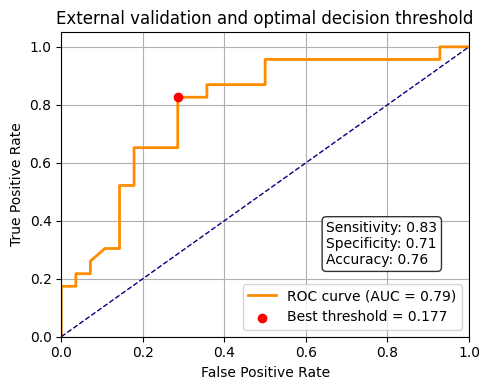

In [35]:
# External validation in immune model

from sklearn.metrics import roc_curve, confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# 1. 准备数据
X_full = dt.drop(["Group"], axis=1)
y_full = dt["Group"]

X_test2 = dt2.drop(["Group"], axis=1)
y_test2 = dt2["Group"]

final_model = LGBMClassifier()
final_model.fit(X_full, y_full)

y_pred_proba_val = final_model.predict_proba(X_test2)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test2, y_pred_proba_val)

youden_index = tpr - fpr
best_threshold_index = np.argmax(youden_index)
best_threshold = thresholds[best_threshold_index]
print(f"\nBest decision threshold (Youden index): {best_threshold:.4f}")

y_pred_binary = (y_pred_proba_val >= best_threshold).astype(int)

cm = confusion_matrix(y_test2, y_pred_binary)
tn, fp, fn, tp = cm.ravel()

sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
accuracy = (tp + tn) / (tp + tn + fp + fn)

print(f"\nConfusion Matrix:\n{cm}")
print(f"Sensitivity (Recall for class 1): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Accuracy: {accuracy:.4f}")

import matplotlib.pyplot as plt
from sklearn.metrics import auc

fpr, tpr, thresholds = roc_curve(y_test2, y_pred_proba_val)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')


plt.scatter(fpr[best_threshold_index], tpr[best_threshold_index],
            color='red', label=f'Best threshold = {best_threshold:.3f}', zorder=5)


plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Classification Performance Based on Immune Data')
plt.legend(loc='lower right')


textstr = '\n'.join((
    f'Sensitivity: {sensitivity:.2f}',
    f'Specificity: {specificity:.2f}',
    f'Accuracy: {accuracy:.2f}'))

props = dict(boxstyle='round', facecolor='white', alpha=0.8)
plt.text(0.65, 0.25, textstr, fontsize=10, bbox=props)

plt.grid(True)
plt.tight_layout()
plt.show()

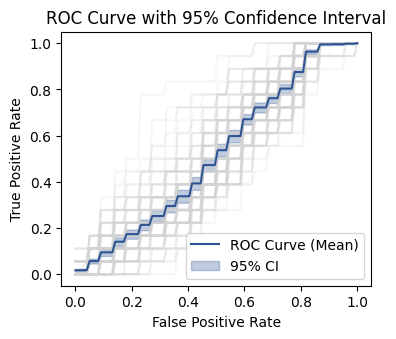

Mean AUC: 0.5165
95% CI for AUC: (0.5030, 0.5300)


In [36]:
# External validation in clinical model (100 samplings)
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc as sklearn_auc


dt = pd.read_csv(r"~\Input\Training_clinical.csv", header=0)
y = dt["Group"]
X = dt.drop(["Group"], axis=1)


dt2 = pd.read_csv(r"~\Input\Validation_clinical.csv", header=0)
y_test2 = dt2["Group"]
X_test2 = dt2.drop(["Group"], axis=1)



all_fpr2 = np.linspace(0, 1, 100) 
mean_tpr2 = []  
tpr2_list = []  
auc_scores = []  



for random_state in range(40, 140):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=random_state,stratify=dt["Group"])
    nb = GaussianNB()
    nb_model = nb.fit(X_train, y_train)
    y_pred_proba = nb_model.predict_proba(X_test2)
    fpr2, tpr2, _ = roc_curve(y_test2, y_pred_proba[:,1])
    
    interpolated_tpr2 = np.interp(all_fpr2, fpr2, tpr2)
    
    tpr2_list.append(interpolated_tpr2)
    
    auc = sklearn_auc(fpr2, tpr2)  
    auc_scores.append(auc)


mean_tpr2 = np.mean(tpr2_list, axis=0)
std_tpr2 = np.std(tpr2_list, axis=0)


tpr2_upper = mean_tpr2 + 1.96 * std_tpr2 / np.sqrt(len(tpr2_list))
tpr2_lower = mean_tpr2 - 1.96 * std_tpr2 / np.sqrt(len(tpr2_list))


mean_auc = np.mean(auc_scores)
std_auc = np.std(auc_scores)
ci_upper = mean_auc + 1.96 * std_auc / np.sqrt(len(auc_scores))
ci_lower = mean_auc - 1.96 * std_auc / np.sqrt(len(auc_scores))


pdf_file_path = r"xx.pdf"
plt.figure(figsize=(4, 3.3))  


for tpr2 in tpr2_list:
    plt.plot(all_fpr2, tpr2, alpha=0.2, color='lightgrey')

plt.plot(all_fpr2, mean_tpr2, label='ROC Curve (Mean)', color='#2E5492')
plt.fill_between(all_fpr2, tpr2_lower, tpr2_upper, color='#2E5492', alpha=0.3, label='95% CI')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC Curve with 95% Confidence Interval')
plt.ylim([-0.05, 1.05])
plt.legend(loc='lower right')

plt.savefig(pdf_file_path, format='pdf', bbox_inches='tight')


plt.show()


print(f"Mean AUC: {mean_auc:.4f}")
print(f"95% CI for AUC: ({ci_lower:.4f}, {ci_upper:.4f})")


=== Final Model Performance on External Validation Set ===
AUC: 0.5076
Best decision threshold: 0.0294
Confusion Matrix:
[[ 4 18]
 [ 0 18]]
Sensitivity (Recall for class 1): 1.0000
Specificity: 0.1818
Accuracy: 0.5500


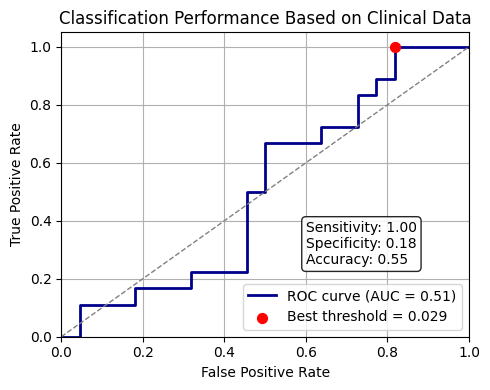

In [37]:
# External validation in clinical model 
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score


X_full = dt.drop(["Group"], axis=1)
y_full = dt["Group"]

X_val = dt2.drop(["Group"], axis=1)
y_val = dt2["Group"]


final_nb = GaussianNB()
final_nb.fit(X_full, y_full)


y_pred_proba_val = final_nb.predict_proba(X_val)[:, 1]


fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba_val)
roc_auc = sklearn_auc(fpr, tpr)


youden_index = tpr - fpr
best_threshold_index = np.argmax(youden_index)
best_threshold = thresholds[best_threshold_index]


y_pred_binary = (y_pred_proba_val >= best_threshold).astype(int)


cm = confusion_matrix(y_val, y_pred_binary)
tn, fp, fn, tp = cm.ravel()


sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
accuracy = (tp + tn) / (tp + tn + fp + fn)


print("\n=== Final Model Performance on External Validation Set ===")
print(f"AUC: {roc_auc:.4f}")
print(f"Best decision threshold: {best_threshold:.4f}")
print(f"Confusion Matrix:\n{cm}")
print(f"Sensitivity (Recall for class 1): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Accuracy: {accuracy:.4f}")



plt.figure(figsize=(5, 4))


plt.plot(fpr, tpr, color='darkblue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')


plt.scatter(fpr[best_threshold_index], tpr[best_threshold_index],
            color='red', s=50, label=f'Best threshold = {best_threshold:.3f}', zorder=5)


plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Classification Performance Based on Clinical Data')
plt.legend(loc='lower right')


textstr = '\n'.join((
    f'Sensitivity: {sensitivity:.2f}',
    f'Specificity: {specificity:.2f}',
    f'Accuracy: {accuracy:.2f}'))

props = dict(boxstyle='round', facecolor='white', alpha=0.85)
plt.text(0.60, 0.25, textstr, fontsize=10, bbox=props)

plt.grid(True)
plt.tight_layout()
plt.show()